In [98]:
"""
An example of tensorboard functionalities using a jupyter notebook.
MNIST faction dataset will be used as an example dataset.

#NOTE no extensive EDA will be included 
"""

'\nAn example of tensorboard functionalities using a jupyter notebook.\nMNIST faction dataset will be used as an example dataset.\n'

In [ ]:
#Install tensorboard
!pip install tensorboard

In [99]:
#Install libraries
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorboard as tb 
from tensorflow import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
#Set log folder

#remove any existing logs
!rm -rf logs/
#For logging and tracking precise records set log time
log_folder='logs/fit/'+datetime.datetime.now().strftime("Y%m%d-%H%M%S")

In [101]:
#Load and prepare data
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

#Scale data
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [102]:
print("Train data",X_train.shape)
print("Test data",X_test.shape)

Train data (60000, 28, 28)
Test data (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


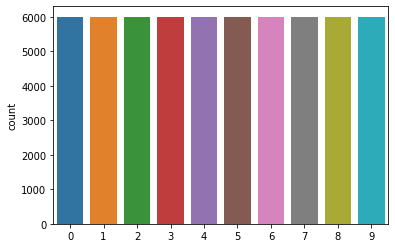

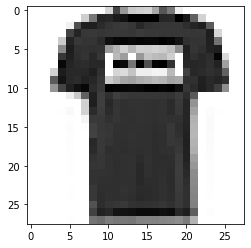

In [103]:
#Explore data
sns.countplot(y_train)
plt.show()

img=X_train[1,:]
plt.imshow(img,cmap='binary')
plt.show()

In [104]:

#Set parameters
es=tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss',min_delta=80)
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1,embeddings_freq=1,write_graph=1,write_images=1,update_freq='epoch',
                                     profile_batch=2)

EPOCHS=100
INPUT_SHAPE=X_train.shape[1:]
BATCH=256
VAL_SPLIT=0.2
NUM_CLASSES=10


In [105]:
#Prepare a deep learning model

model=Sequential()

model.add(Flatten(input_shape=INPUT_SHAPE))
model.add(Dense(512,activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='selu'))
model.add(Dropout(0.2))

model.add(Dense(NUM_CLASSES,activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 512)               401920    
                                                                 
 dropout_55 (Dropout)        (None, 512)               0         
                                                                 
 dense_67 (Dense)            (None, 256)               131328    
                                                                 
 dropout_56 (Dropout)        (None, 256)               0         
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dropout_57 (Dropout)        (None, 128)             

In [106]:
from keras.callbacks import TensorBoard
#Train model
#load tensorboard
%load_ext tensorboard
history=model.fit(X_train,y_train,batch_size=BATCH,epochs=EPOCHS,validation_split=VAL_SPLIT,callbacks=[tb_cb]) #es can be included also

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
188/188 [==============================] - 2s 8ms/step - loss: 0.9912 - accuracy: 0.6852 - val_loss: 0.4703 - val_accuracy: 0.8347
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.6082 - accuracy: 0.7943 - val_loss: 0.4174 - val_accuracy: 0.8507
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.5241 - accuracy: 0.8162 - val_loss: 0.3983 - val_accuracy: 0.8578
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4829 - accuracy: 0.8311 - val_loss: 0.3934 - val_accuracy: 0.8593
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4488 - accuracy: 0.8422 - val_loss: 0.3963 - val_accuracy: 0.8585
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4276 - accuracy: 0.8497 - val_loss: 0.3835 - val_accuracy: 0.8623
Epoch 7/100
188/188 [==============================]

This time callbacks for early stopping are not used since we want to assess a range of behaviours for the model which include early fittingt, any fluctuations and overfitting.

In [ ]:
#Assess model performance
epochs=history.epoch
history=history.history

Best epoch 53 

Model evaluation 

313/313 [==============================] - 1s 2ms/step - loss: 0.5029 - accuracy: 0.9002
[0.5029205679893494, 0.9002000093460083] 

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.85      0.84      1000
           3       0.91      0.90      0.91      1000
           4       0.83      0.84      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.73      0.74      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



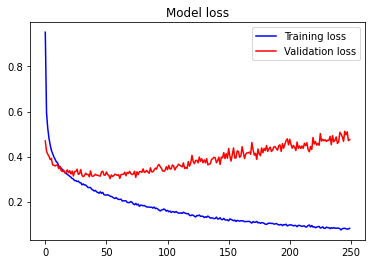

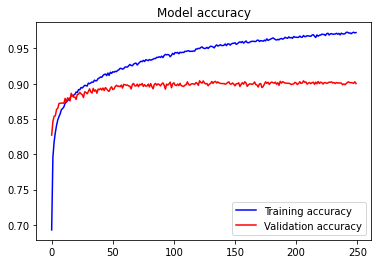

In [ ]:
print("Best epoch",np.argmin(history['val_loss']),"\n")
print("Model evaluation \n")
results=model.evaluate(X_test,y_test)
print(results,"\n")

y_pred=model.predict(X_test)
print(classification_report(y_test,np.argmax(y_pred,axis=1)))

plt.plot(epochs,history['loss'],'-b',label="Training loss")
plt.plot(epochs,history['val_loss'],'-r',label="Validation loss")
plt.legend()
plt.title("Model loss")
plt.show()

plt.plot(epochs,history['accuracy'],'-b',label="Training accuracy")
plt.plot(epochs,history['val_accuracy'],'-r',label="Validation accuracy")
plt.legend()
plt.title("Model accuracy")
plt.show()

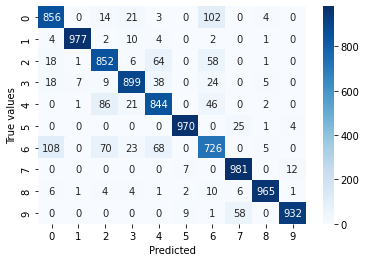

In [92]:
sns.heatmap(confusion_matrix(y_test,np.argmax(y_pred,axis=1)),annot=True,cmap="Blues",fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.show()

In [ ]:

#Define additional functions for tensorbaord to evaluate images
file_writer=tf.summary.create_file_writer(log_folder)

#Inspect 10 images
with file_writer.as_default():
  images=np.reshape(X_train[:10],(-1,28,28,1))
  tf.summary.image("Items",images,max_outputs=20,step=0)



In [ ]:
#Load tensorbaord to explore the model in depth
%tensorboard --logdir logs #for the notebook, call specific logs folder
